In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## data

In [3]:
# data func
def get_result_data():
    eturb_m1_result_base = pd.read_csv("E:/dev/test/eturb_model/result/regression/eturb_m1_result_base.csv")
    eturb_m1_result_delta = pd.read_csv("E:/dev/test/eturb_model/result/regression/eturb_m1_result_delta.csv")
    eturb_m1_result_origin = pd.read_csv("E:/dev/test/eturb_model/result/regression/eturb_m1_result_origin.csv")
    eturb_m2_result_base = pd.read_csv("E:/dev/test/eturb_model/result/regression/eturb_m2_result_base.csv")
    eturb_m2_result_delta = pd.read_csv("E:/dev/test/eturb_model/result/regression/eturb_m2_result_delta.csv")
    eturb_m2_result_origin = pd.read_csv("E:/dev/test/eturb_model/result/regression/eturb_m2_result_origin.csv")

    return eturb_m1_result_base, eturb_m1_result_delta, eturb_m1_result_origin, eturb_m2_result_base, eturb_m2_result_delta, eturb_m2_result_origin

# data
eturb_m1_result_base, eturb_m1_result_delta, eturb_m1_result_origin, eturb_m2_result_base, eturb_m2_result_delta, eturb_m2_result_origin = get_result_data()

## histogram version 1

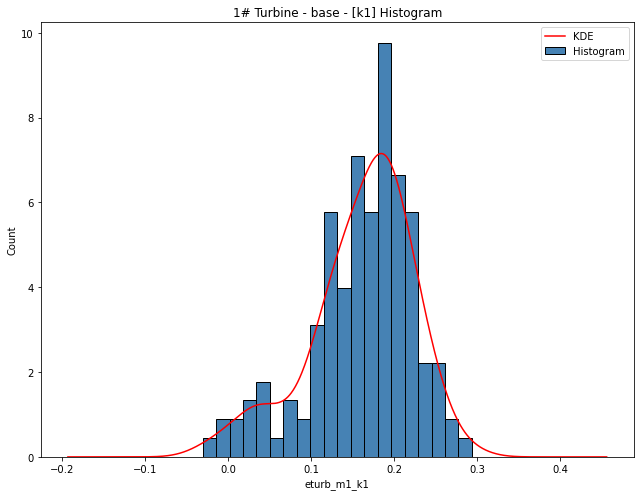

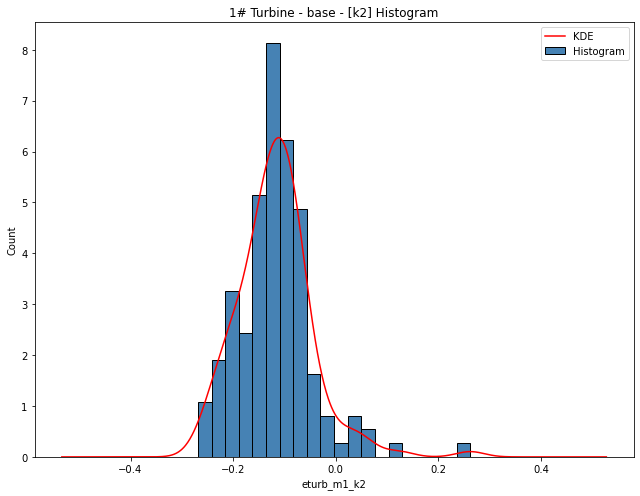

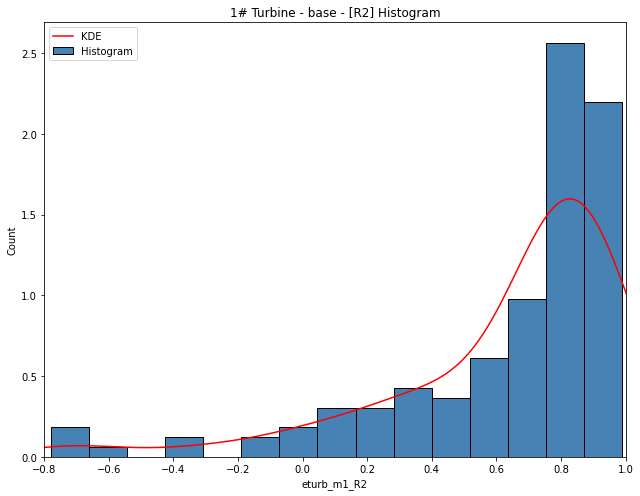

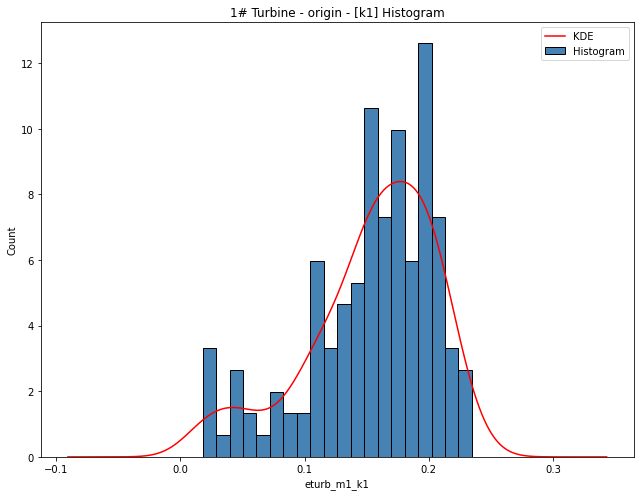

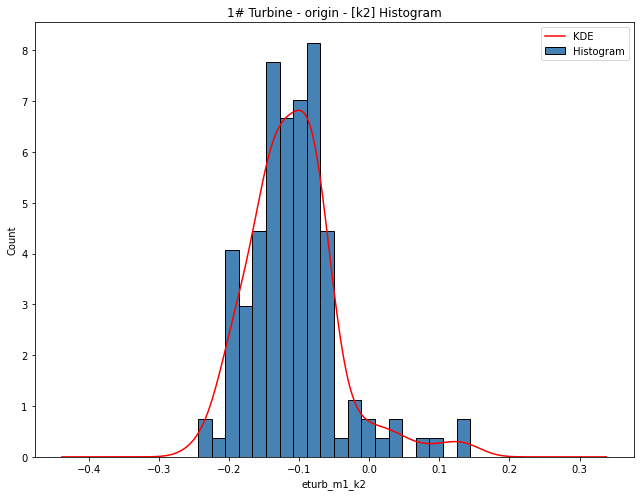

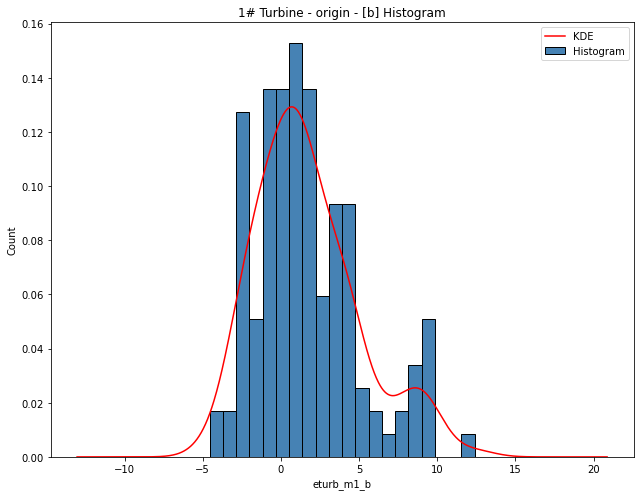

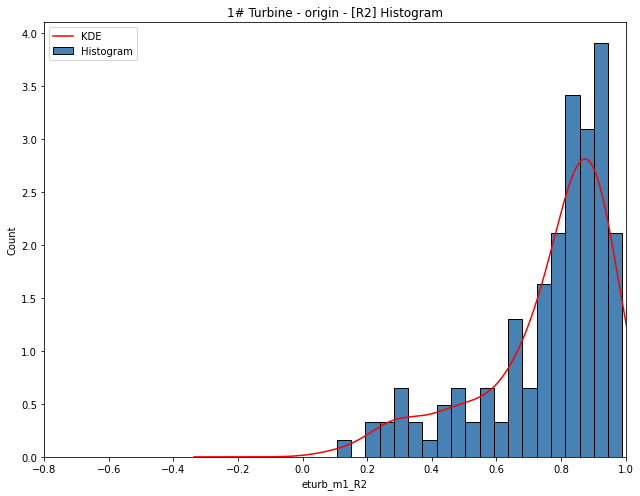

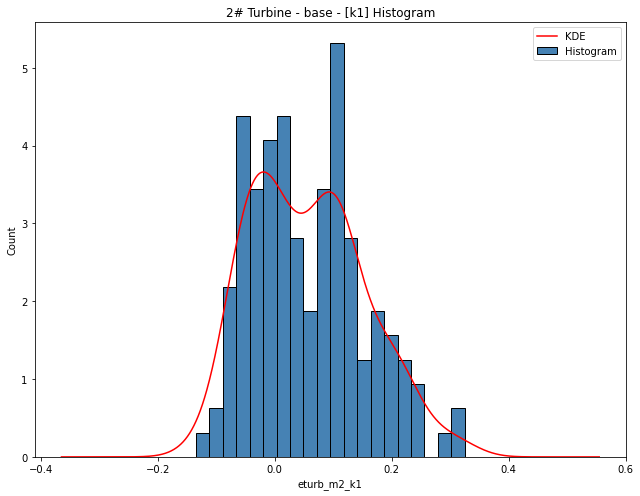

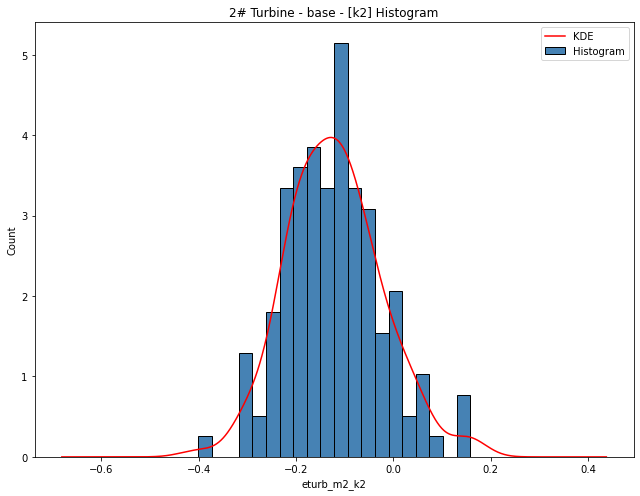

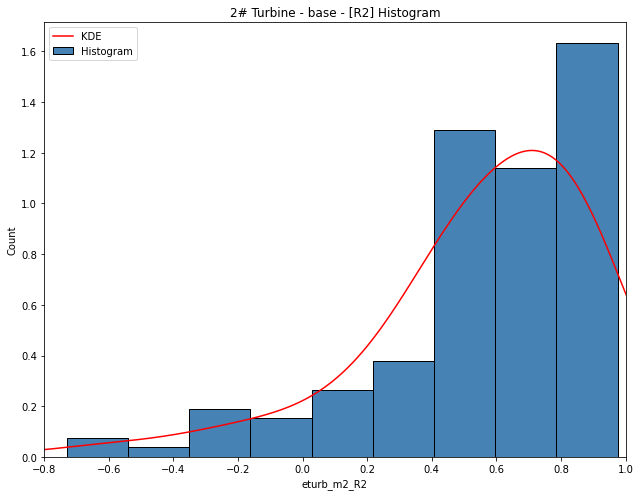

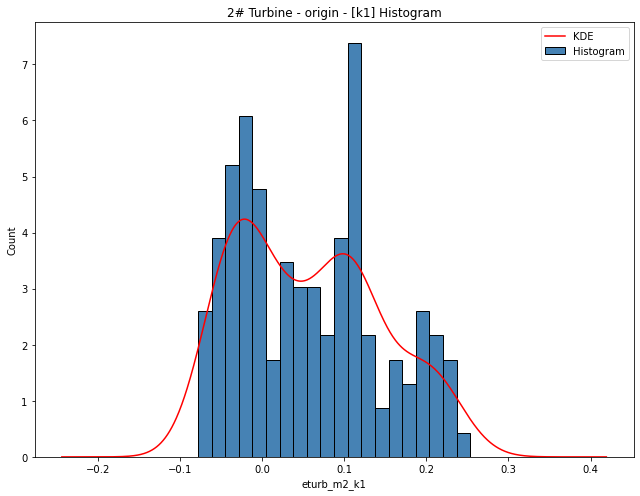

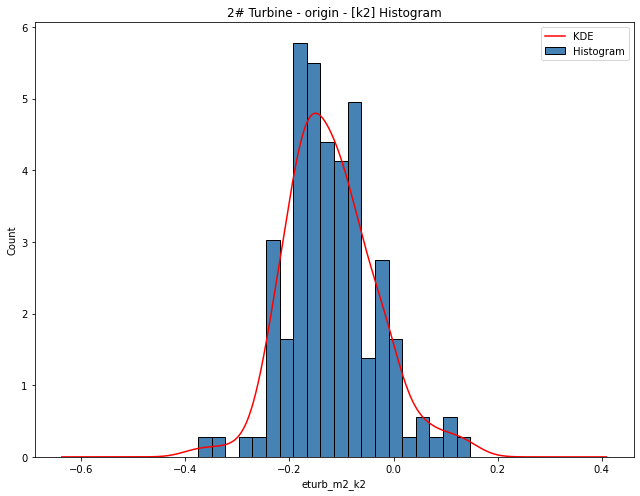

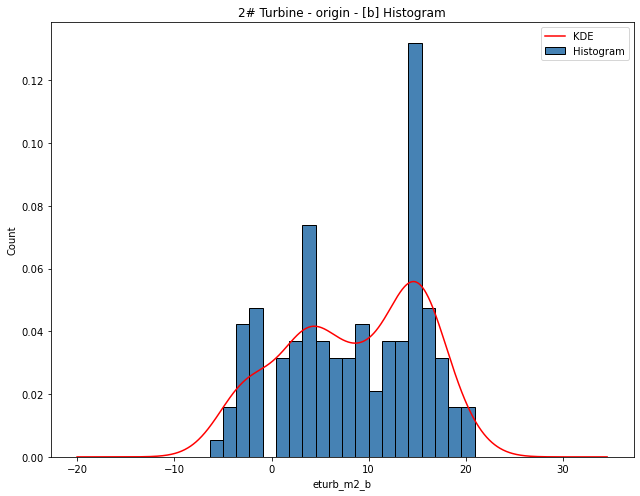

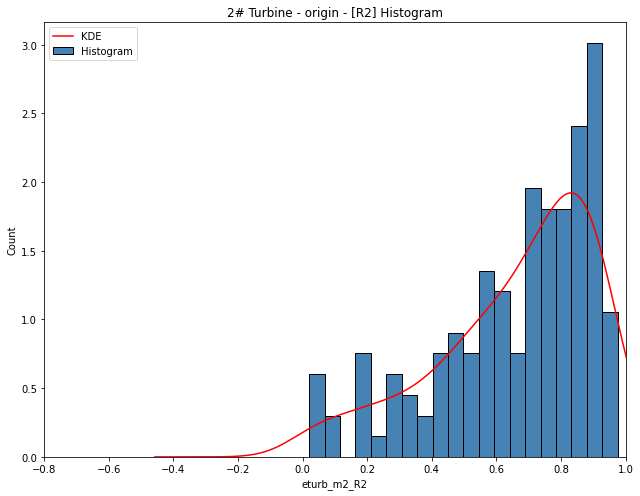

In [10]:
data = {
    "eturb_m1_base": {
        "title": "1# Turbine - base",
        "data": eturb_m1_result_base,
        "metric": ["eturb_m1_k1", "eturb_m1_k2", "eturb_m1_R2"],
    },
    #     "eturb_m1_result_delta": {
    #         "data": eturb_m1_result_delta,
    #         "metric": ["eturb_m1_k1", "eturb_m1_k2", "eturb_m1_R2"],
    #     },
    "eturb_m1_origin": {
        "title": "1# Turbine - origin",
        "data": eturb_m1_result_origin,
        "metric": ["eturb_m1_k1", "eturb_m1_k2", "eturb_m1_b", "eturb_m1_R2"]
    },
    "eturb_m2_base": {
        "title": "2# Turbine - base",
        "data": eturb_m2_result_base,
        "metric": ["eturb_m2_k1", "eturb_m2_k2", "eturb_m2_R2"],
    },
    #     "eturb_m2_result_delta": {
    #         "data": eturb_m2_result_delta,
    #         "metric": ["eturb_m2_k1", "eturb_m2_k2", "eturb_m2_R2"],
    #     },
    "eturb_m2_origin": {
        "title": "2# Turbine - origin",
        "data": eturb_m2_result_origin,
        "metric": ["eturb_m2_k1", "eturb_m2_k2", "eturb_m2_b", "eturb_m2_R2"],
    },
}

for key, value in data.items():
    for k in value["metric"]:
        fig, axs = plt.subplots(figsize = (9, 7), sharey = True, tight_layout = True)
        value["data"][k].plot(kind = "hist", bins = 20, color = "steelblue", edgecolor = "black", density = True, label = "Histogram")
        value["data"][k].plot(kind = "kde", color = "red", label = "KDE")
        plt.xlabel("%s" % k)
        plt.ylabel("Count")
        if k in ["eturb_m1_R2", "eturb_m2_R2"]:
            plt.xlim(-0.8, 1)
        plt.title("%s - [%s] Histogram" % (value["title"], k.split("_")[-1]))
        plt.legend()
        plt.savefig("E:/dev/test/eturb_model/%s_%s.jpg" % (key, k))
        plt.show()

## histogram version 2

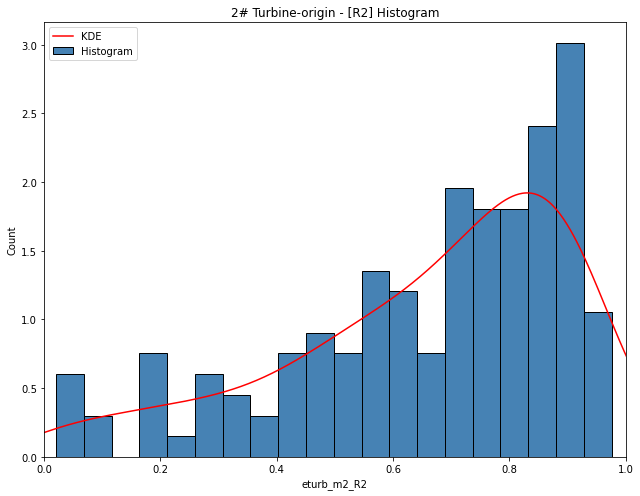

In [114]:
def get_param_histogram(turbine_num, reg_method, value, xlim_min, xlim_max):
    fig, axs = plt.subplots(figsize = (9, 7), sharey = True, tight_layout = True)
    if turbine_num == "m1" and reg_method == "base":
        data = eturb_m1_result_base
    elif turbine_num == "m1" and reg_method == "origin":
        data = eturb_m1_result_origin
    elif turbine_num == "m2" and reg_method == "base":
        data = eturb_m2_result_base
    elif turbine_num == "m2" and reg_method == "origin":
        data = eturb_m2_result_origin

    metric = "eturb_%s_%s" % (turbine_num, value)
    title = "%d# Turbine-%s" % (int(turbine_num[-1]), reg_method)
    file = "%s" % title

    data[metric].plot(kind = "hist", bins = 20, color = "steelblue", edgecolor = "black", density = True, label = "Histogram")
    data[metric].plot(kind = "kde", color = "red", label = "KDE")
    plt.xlabel("%s" % metric)
    plt.ylabel("Count")
    plt.xlim(xlim_min, xlim_max)
    plt.title("%s - [%s] Histogram" % (title, value))
    plt.legend()
    plt.savefig("E:/dev/test/eturb_model/%s-%s.jpg" % (file, metric))
    plt.show()

get_param_histogram(turbine_num = "m2", reg_method = "origin", value = "R2", xlim_min = -1.0, xlim_max = 1.0)